# Ejemplo de integración de EDOs con `scipy.integrate`

Importamos lo que nos hace falta

In [1]:
from scipy.special import gamma, airy
from scipy.integrate import odeint, ode
import numpy as np

Condiciones iniciales

In [2]:
y0 = np.empty((2,))

y0[0] = 1.0 / 3 ** (2. / 3) / gamma(2. / 3)
y0[1] = - 1.0 / 3 ** (1. / 3) / gamma(1. / 3)

Definimos el lado derecho de la EDO a integrar

In [3]:
def func(y, z):
    return np.array([y[1], z * y[0]])

Discretizamos el dominio

In [4]:
z = np.arange(0, 4., 0.01)

Calculamos la solución analítica, $w_{ana}(z)$

In [5]:
w_ana = airy(z)[0]

Hacemos la integración numérica con `odeint`. La función del LDE debe ser de la forma `f(y, t)`

In [6]:
y_odeint = odeint(func, y0, z)
w_odeint = y_odeint[:,0]

Comparamos los resultados

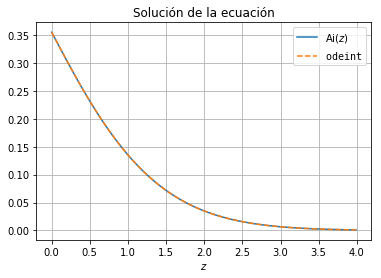

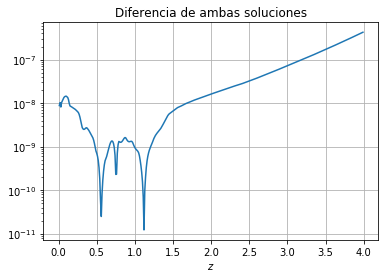

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Solución de la ecuación")
plt.plot(z, w_ana, label=r"$\mathrm{Ai}(z)$")
plt.plot(z, w_odeint, label=r"$\mathtt{odeint}$", ls="--")
plt.legend(loc="best")
plt.xlabel(r"$z$")
plt.grid(True)

plt.figure()
plt.title("Diferencia de ambas soluciones")
plt.semilogy(z, np.abs(w_odeint - w_ana))
plt.xlabel(r"$z$")
plt.grid(True)

plt.show()